In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/train.csv


In [2]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
features = train.values[:, 1:].reshape((-1,28,28,1))
labels = train.values[:, 0]

(array([[28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [26.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.],
        [23.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  2.],
        [22.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  4.],
        [21.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  5.],
        [20.,  0.,  0.,  2.,  0.,  1.,  1.,  2.,  0.,  2.],
        [22.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  3.],
        [22.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  4.],
        [21.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  3.],
        [22.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  4.],
        [23.,  1.,  0.,  0.,  0.,  0.,  

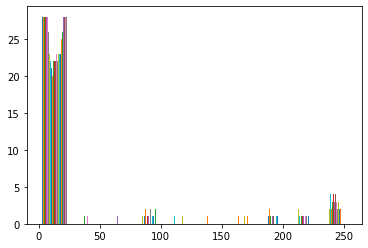

In [6]:
import matplotlib.pyplot as plt
sample = features[0]

plt.hist(sample.reshape((28,28)))

In [7]:
# Dataset processing
from keras.utils import to_categorical

features = features / 255.0
labels = to_categorical(labels)

(array([[28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [26.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.],
        [23.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  2.],
        [22.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  4.],
        [21.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  5.],
        [20.,  0.,  0.,  2.,  0.,  1.,  1.,  2.,  0.,  2.],
        [22.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  3.],
        [22.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  4.],
        [21.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  3.],
        [22.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  4.],
        [23.,  1.,  0.,  0.,  0.,  0.,  

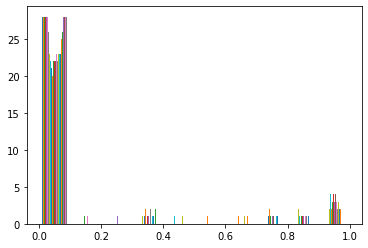

In [8]:
sample = features[0]
plt.hist(sample.reshape((28,28)))

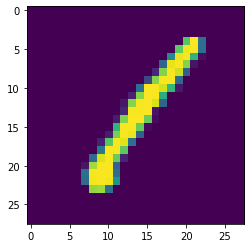

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
def plot_image(image):
    assert len(image.shape) in [2,3]
    shape = image.shape
    assert shape[0] == shape[1]
    if len(shape) == 3 and shape[2]==1:
        image = image.reshape((shape[0],shape[0]))
    plt.imshow(image)
    plt.show()
plot_image(sample)
print(labels[0])

**Conditional GAN**
ConditionalGAN takes in additional label information to generate a specific image. In our case, the one-hot encoded digit label and a 100 dimension label vector are inputs to the image. Labels controls what digit has to be generated while the latent vector controls the styling of character generated.
To read more about this, check out the original [paper](https://arxiv.org/pdf/1411.1784.pdf).
![Architecture](https://guimperarnau.com/files/blog/Fantastic-GANs-and-where-to-find-them/cGAN_overview.jpg)

In [10]:
print(features.shape,labels.shape)

(42000, 28, 28, 1) (42000, 10)


In [11]:
size = 42000
perc = 95
split = size * perc // 100
train_features, train_labels = features[:split], labels[:split]
test_features, test_labels = features[split:], labels[split:]

# Start here

In [14]:
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical

In [15]:
(train_features, train_labels), (test_features, test_labels) = tf.keras.datasets.mnist.load_data()
train_features = np.expand_dims(train_features, -1) / 255.
test_features = np.expand_dims(test_features, -1) / 255.
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print("Train images:", train_features.shape)
print("Train labels:", train_labels.shape)

Train images: (60000, 28, 28, 1)
Train labels: (60000, 10)


In [16]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *

In [17]:
def build_generator(z_shape, y_shape):
    n_nodes = 128*7*7
    
    # Image shape = 28,28,1
    z = Input(shape=(z_shape,))      # latent vector = (100,1)
    z_i = Dense(n_nodes)(z)
    z_i = Reshape((7,7,128))(z_i)
    
    
    y = Input(shape=(y_shape,))      # label shape = (10,1)
    y_i = Dense(49)(y)  # 49,1
    y_i = Reshape((7,7,1))(y_i) 
    
    merge = Concatenate()([z_i, y_i]) # Output: (7,7,129)
    
    out = Conv2DTranspose(128, 4, 2, padding='same')(merge) # (14,14,128)
    out = LeakyReLU(alpha=0.2)(out)
    
    out = Conv2DTranspose(128, 4, 2, padding='same')(out) # (28,28,128)
    out = LeakyReLU(alpha=0.2)(out)
    
    out = Conv2DTranspose(1, 7, 1, padding='same',activation='sigmoid')(out) # (28,28,1)
    
    model = Model([z,y],out)
    model.summary()
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy',optimizer=opt)
    return model
    
gen = build_generator(100, 10)    

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 10)]         0                                            
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 6272)         633472      input_5[0][0]                    
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 49)           539         input_6[0][0]                    
_______________________________________________________________________________________

In [18]:
def build_discriminator(img_shape, y_shape): 
    # Image shape = 28,28,1
    x = Input(shape=img_shape)  
    x_i = Conv2D(64,4,2,padding='same')(x)
    x_i = ReLU()(x_i)
    
    x_i = Conv2D(128,4,2,padding='same')(x_i)
    x_i = ReLU()(x_i)
    
    
    y = Input(shape=(y_shape,))      # label shape = (10,1)
    y_i = Dense(49)(y)  # 49,1
    y_i = Reshape((7,7,1))(y_i) 
    
    merge = Concatenate()([x_i, y_i]) # Output: (7,7,129)
    out = Conv2D(256,4,2,padding='same')(merge)
    
    out = Flatten()(out)
    
    out = Dense(1024)(out) 
    
    out = Dense(512)(out) 
    out = ReLU()(out)
    
    out = Dense(256)(out) 
    out = ReLU()(out)
    
    out = Dense(1, activation='sigmoid')(out) 
    
    model = Model([x,y],out)
    model.summary()
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy',optimizer=opt)
    return model
    
disc = build_discriminator((28,28,1), 10)    

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 14, 14, 64)   1088        input_7[0][0]                    
__________________________________________________________________________________________________
re_lu_4 (ReLU)                  (None, 14, 14, 64)   0           conv2d_3[0][0]                   
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 10)]         0                                            
_______________________________________________________________________________________

In [19]:
def build_gan(g,d):
    d.trainable = False
    # get generator inputs/outputs
    z, y = g.input
    x_g = g.output
    
    gan_output = d([x_g, y])
    model = Model([z, y], gan_output)
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    model.summary()
    return model
gan = build_gan(gen, disc)

Model: "functional_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 10)]         0                                            
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 6272)         633472      input_5[0][0]                    
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 49)           539         input_6[0][0]                    
______________________________________________________________________________________

In [20]:
import random
def generate_real_samples(image, labels, n_samples):
    ix = np.random.randint(0, image.shape[0], n_samples)
    x, lbls = image[ix], labels[ix]
    y_ones = np.ones((n_samples,1))
    return [x,lbls], y_ones

In [21]:
def generate_latent_points(latent_dim, n_samples, n_class=10):
    x_input = np.random.randn(latent_dim*n_samples)
    z_input = x_input.reshape(n_samples, latent_dim)
    labels = to_categorical(np.random.randint(0, n_class, n_samples),num_classes=10)
    return [z_input, labels]

In [22]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
    z_input, labels_input = generate_latent_points(latent_dim, n_samples)
    images = generator.predict([z_input, labels_input])
    y = np.zeros((n_samples, 1))
    return [images, labels_input], y

In [23]:
def train(g, d, gan, dataset, latent_dim, n_epochs=100, n_batch=128):
    bat_per_epo = int(dataset[0].shape[0]/n_batch)
    half_batch = int(n_batch / 2)
    for i in range(n_epochs):
        print("Epoch:", i)
        for j in range(bat_per_epo):
            # get random real samples
            [x_real, labels_real],y_real = generate_real_samples(dataset[0], dataset[1], half_batch)
            # train discriminator
            d_loss1 = d.train_on_batch([x_real, labels_real], y_real)
            
            # Generate fake samples
            [x_fake, labels], y_fake = generate_fake_samples(g, latent_dim, half_batch)
            # train discriminator
            d_loss2 = d.train_on_batch([x_fake, labels], y_fake)
            
            # prepare latent points 
            z_input, labels = generate_latent_points(latent_dim,n_batch)
            y_gan = np.ones((n_batch,1))
            
            # train gan
            g_loss = gan.train_on_batch([z_input, labels], y_gan)
            if j % 100 == 0:
                print("D1 Loss:",d_loss1, "D2 Loss:",d_loss2,"GAN Loss:",g_loss)
            
    g.save('cgan_generator.h5')
    d.save('cgan_discriminator.h5')
    gan.save('gan.h5')

In [24]:
train(gen, disc, gan, [train_features, train_labels], 100, n_epochs = 50)

Epoch: 0
D1 Loss: 0.6875414848327637 D2 Loss: 0.834050714969635 GAN Loss: 0.6820405125617981
D1 Loss: 0.1663215458393097 D2 Loss: 0.1433887928724289 GAN Loss: 4.281071662902832
D1 Loss: 0.15488864481449127 D2 Loss: 0.1457926332950592 GAN Loss: 3.8406670093536377
D1 Loss: 0.32538431882858276 D2 Loss: 0.07217840850353241 GAN Loss: 4.7189178466796875


KeyboardInterrupt: 

In [26]:
import matplotlib.pyplot as plt

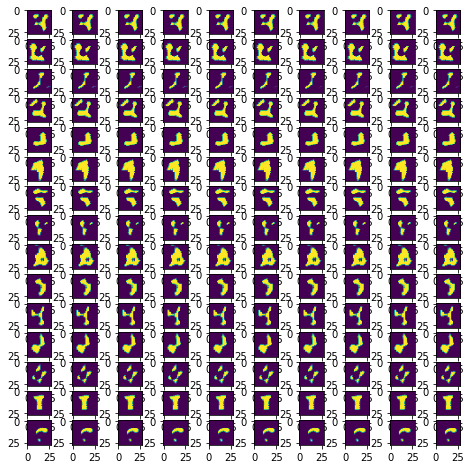

In [27]:
def generate_sample(g, n=15, latent=100):
    vals = to_categorical(np.array([x for x in range(0,10)]),num_classes=10)
    z_vec = generate_latent_points(latent, n)[0]
    columns = 10
    rows = n
    fig=plt.figure(figsize=(8, 8))
    k = 1
    for j in range(z_vec.shape[0]):
        z = z_vec[j].reshape((1,latent))
        for i in range(vals.shape[0]):
            one_hot = vals[i].reshape((1,10))
            result = g.predict([z,one_hot])[0].reshape((28,28))
            fig.add_subplot(rows, columns, k)
            plt.imshow(result)
            k += 1
    plt.show()
    
generate_sample(gen)